<a href="https://colab.research.google.com/github/bnnguyen/DESLab_ML_training_2024/blob/main/Deslab_2024_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dùng Random Forests, Decision Trees, and Bagging Models trên Political Bias Dataset

In [ ]:
# data processing and visualization imports
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# forest and bagging model imports
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://raw.githubusercontent.com/arjun-prabhakar/crimson-data-science/main/political_bias.csv'

data = pd.read_csv(url)
data.head()

,q212813,d_income,d_bodytype,d_age,race,gender,p_kinky,p_artsy,p_scien,d_religion_type
0,Liberal / Left-wing,"$100,000-$150,000",Average,31.0,Indian,Man,-15.0,-33.0,17.0,Agnosticism
1,Liberal / Left-wing,"$20,000-$30,000",Average,28.0,Asian,Man,-60.0,-18.0,-57.0,Islam
2,Liberal / Left-wing,"$100,000-$150,000",Average,33.0,Mixed,Man,-27.0,-40.0,53.0,Christianity
3,Centrist,"Less than $20,000",A little extra,27.0,White,Man,-59.0,62.0,42.0,Agnosticism
4,Liberal / Left-wing,"$20,000-$30,000",Average,28.0,White,Man,47.0,62.0,19.0,Atheism


In [ ]:
data.describe()

,d_age,p_kinky,p_artsy,p_scien
count,1062.000000,1062.000000,1062.000000,1062.000000
mean,34.152542,5.238230,-1.241996,3.188324
std,7.958143,47.619652,43.787087,35.738029
min,18.000000,-90.000000,-92.000000,-99.000000
25%,28.000000,-33.000000,-34.500000,-21.000000
50%,33.000000,6.000000,-2.000000,7.000000
75%,39.000000,45.500000,32.000000,29.000000
max,94.000000,98.000000,97.000000,82.000000


### Mã hóa biến giả (xử lý biến định tính)

In [ ]:
# creating dummy variables to represent qualitative variables

# politics
le_politics = preprocessing.LabelEncoder().fit(data['q212813'].unique())
data.loc[:,'politics'] = le_politics.transform(data['q212813'])

# gender
le_gender = preprocessing.LabelEncoder().fit(data['gender'].unique())
data.loc[:,'gender'] = le_gender.transform(data['gender'])

# income
le_income = preprocessing.LabelEncoder().fit(data['d_income'].unique())
data.loc[:,'income'] = le_income.transform(data['d_income'])

# bodytype
le_bodytype = preprocessing.LabelEncoder().fit(data['d_bodytype'].unique())
data.loc[:,'bodytype'] = le_bodytype.transform(data['d_bodytype'])

# race
le_race = preprocessing.LabelEncoder().fit(data['race'].unique())
data.loc[:,'race'] = le_race.transform(data['race'])

# religion
le_religion = preprocessing.LabelEncoder().fit(data['d_religion_type'].unique())
data.loc[:,'religion'] = le_religion.transform(data['d_religion_type'])

In [ ]:
#check data now
data.head()

,q212813,d_income,d_bodytype,d_age,race,gender,p_kinky,p_artsy,p_scien,d_religion_type,politics,income,bodytype,religion
0,Liberal / Left-wing,"$100,000-$150,000",Average,31.0,3,0,-15.0,-33.0,17.0,Agnosticism,2,0,2,0
1,Liberal / Left-wing,"$20,000-$30,000",Average,28.0,0,0,-60.0,-18.0,-57.0,Islam,2,2,2,6
2,Liberal / Left-wing,"$100,000-$150,000",Average,33.0,5,0,-27.0,-40.0,53.0,Christianity,2,0,2,4
3,Centrist,"Less than $20,000",A little extra,27.0,8,0,-59.0,62.0,42.0,Agnosticism,0,11,0,0
4,Liberal / Left-wing,"$20,000-$30,000",Average,28.0,8,0,47.0,62.0,19.0,Atheism,2,2,2,1


### Tạo cây cơ bản với 1 đầu vào

In [ ]:
# first, let's make a small tree with 1 input to predict the politics output (Input: income)

# getting X and Y values from dataset.
Xvals = data['income'].to_numpy().reshape(-1,1)
Yvals = data["politics"].values
# Look at .to_numpy() documentation for Xvals
# Need to reshape after using .to_numpy() to constrain to one column with N rows


# splitting the data into train and test sets. Set the test set size to 20% of the data. Set a seed.
X_train, X_test, y_train, y_test = train_test_split(Xvals, Yvals, test_size=0.2, random_state=10)

Using income only:0.6009389671361502


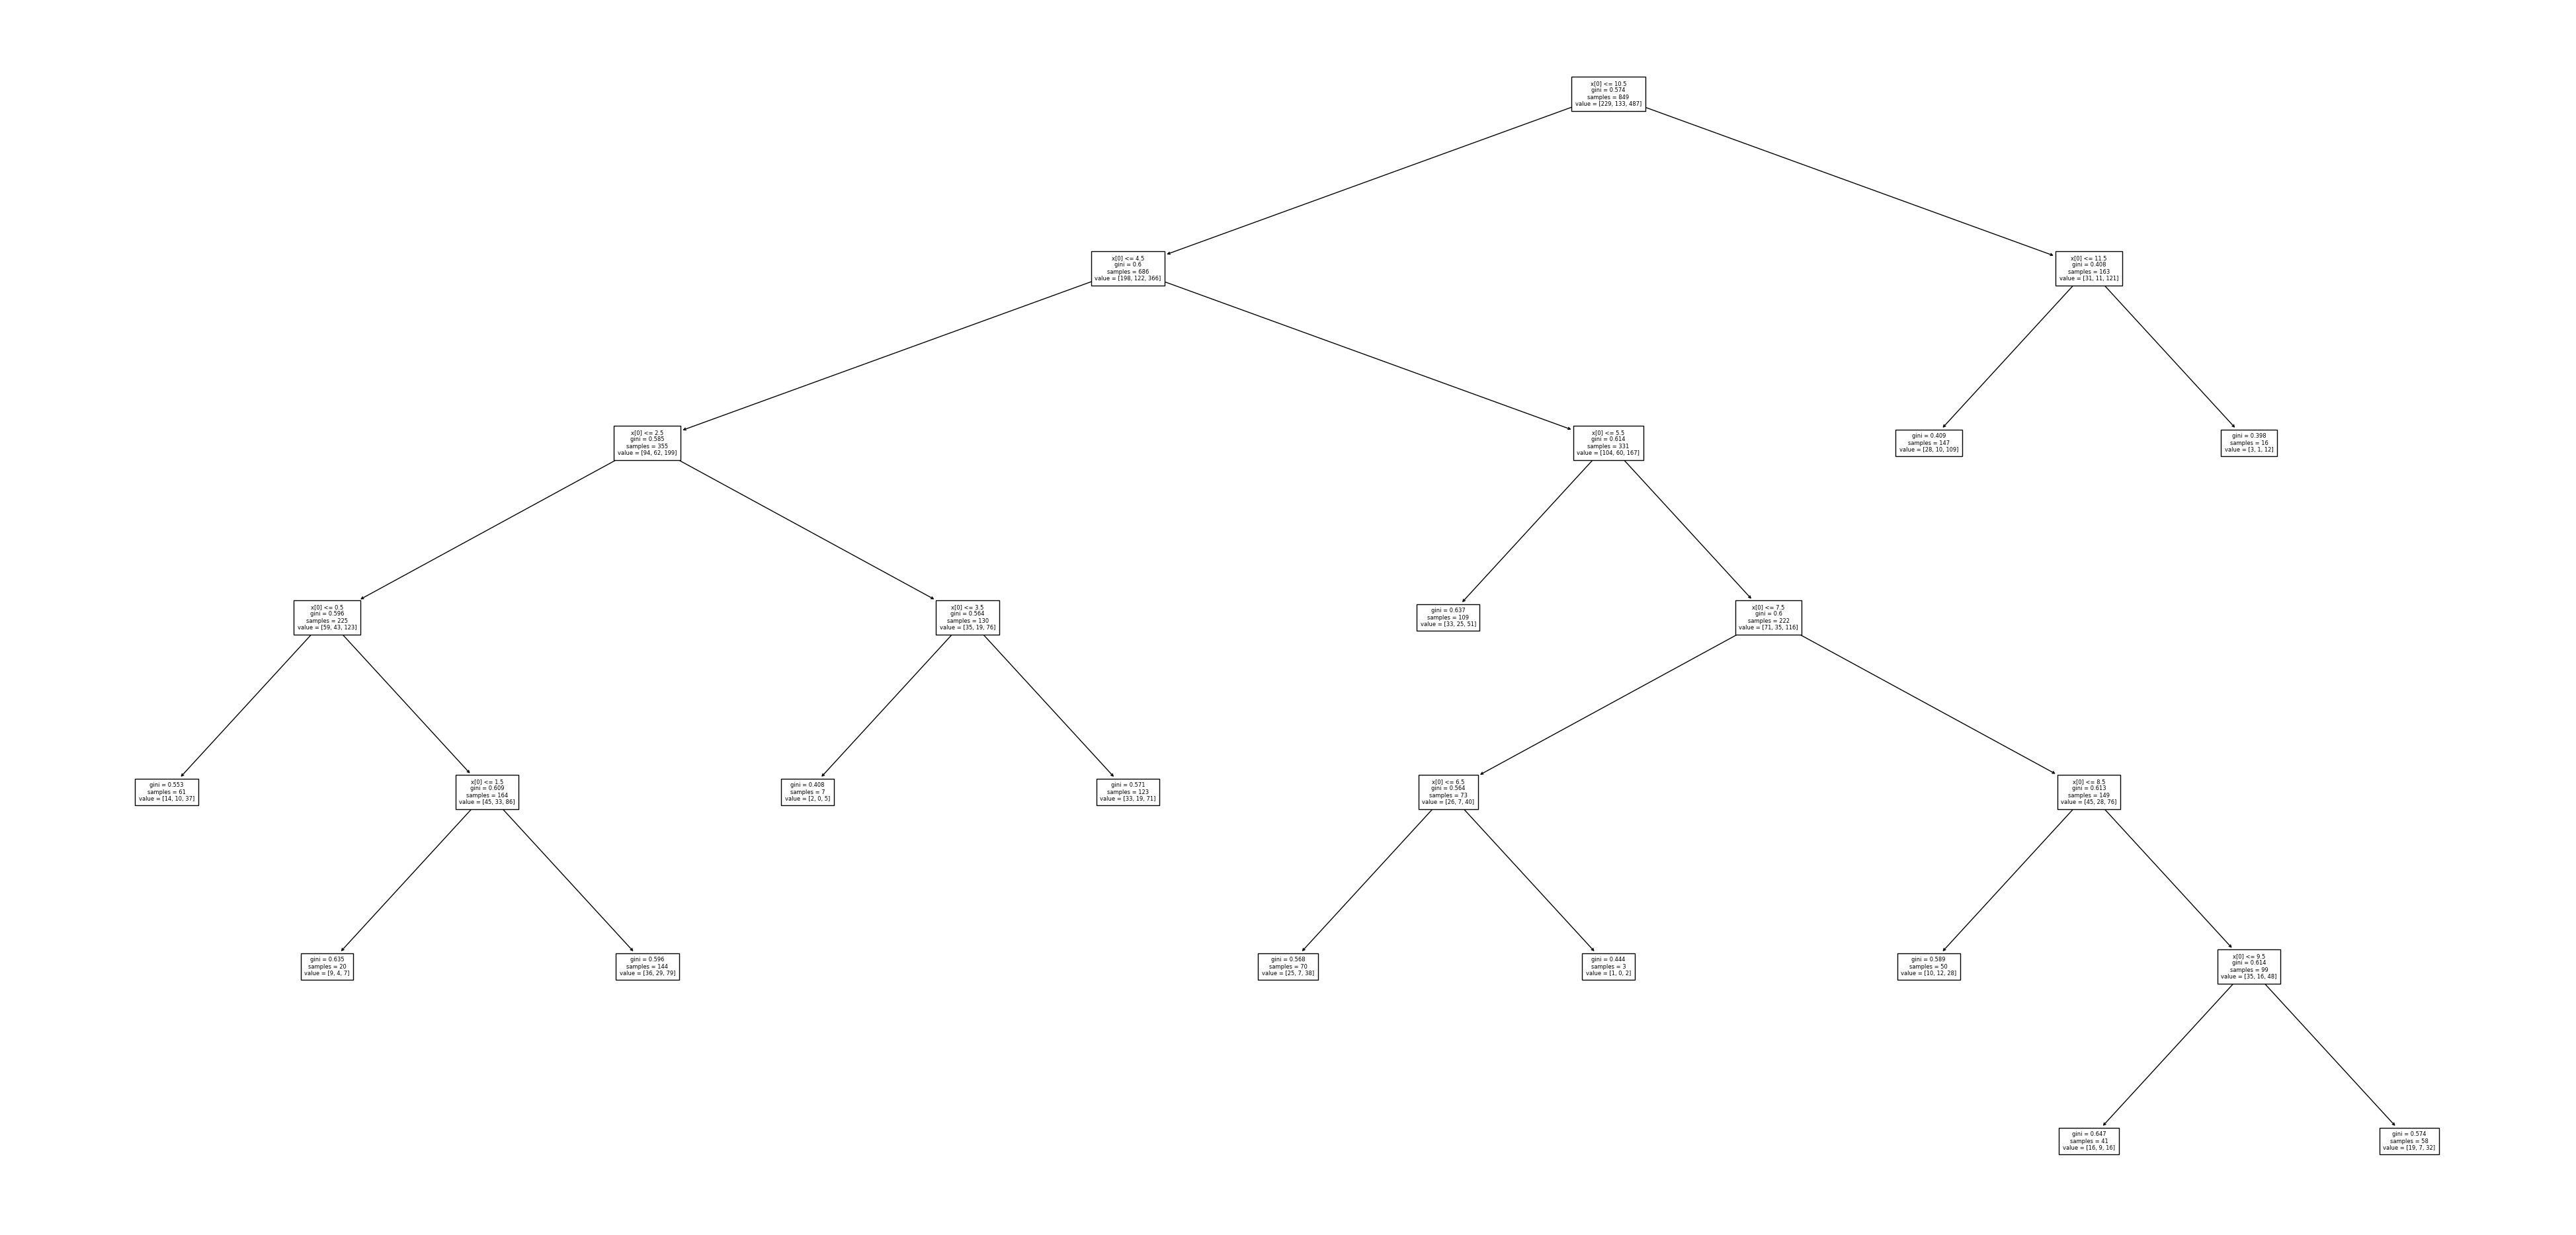

In [ ]:
# Create the Decision Tree Classifier Object
clf = tree.DecisionTreeClassifier()

# Fit on training data
clf = clf.fit(X_train, y_train)

# Check fit
y_pred = clf.predict(X_test)

# Plot the tree. Use plt.subplots
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, fontsize=6)



# check out accuracy
print("Using income only:" + str(accuracy_score(y_test, y_pred)))

### Decision tree lớn hơn bằng cách sử dụng nhiều đầu vào

In [ ]:
# Now let's construct a bigger tree using more features: race, religion, and income
feats = ['race', 'religion', 'income']

# getting X and Y values from dataset
Yval = data['politics'].values
Xvals = data[feats].values
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xvals, Yvals, test_size=0.2, random_state=10)

In [ ]:
# Use DecisionTreeClassifier Object and fit
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


#plot tree
tree.plot_tree(clf)

# check out accuracy
y_pred = clf.predict(X_train)
# in sample:
print("Big tree - in sample: " + str(accuracy_score(y_train, y_pred)))
# out sample:
y_pred = clf.predict(X_test)
print("Big tree - out sample: " + str(accuracy_score(y_test, y_pred)))


Big tree - in sample: 0.6996466431095406
Big tree - out sample: 0.5727699530516432


### Decision tree cuối cùng sử dụng tất cả đầu vào

In [ ]:
# Use all features now
all_feat = ['race'
            , 'gender'
            , 'religion'
            , 'income'
            , 'bodytype'
            , 'p_kinky'
            , 'p_artsy'
            , 'p_scien']

# Get X and Y values from dataset
Yvals = data['politics'].values
Xvals = data.loc[:, all_feat]

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xvals, Yvals, test_size=0.2, random_state=10)

In [ ]:
# Use DecisionTreeClassifier Object and fit
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# check out accuracy
y_pred = clf.predict(X_train)
# in sample:
print("Big tree - in sample: " + str(accuracy_score(y_train, y_pred)))
# out sample:
y_pred = clf.predict(X_test)
print("Big tree - out sample: " + str(accuracy_score(y_test, y_pred)))


### Ví dụ về Bagging Classifier model

In [ ]:
# Lets look at a bagging classifier
bag = BaggingClassifier(n_estimators=1000, oob_score=True)
bag = bag.fit(X_train, y_train)
# check out accuracy
# in sample:
y_pred = bag.predict(X_test)
print("Bagging - Accuracy Score: " + str(accuracy_score(y_test, y_pred)))
# out sample:
print("Bagging - OOB Score: " + str(bag.oob_score_))

### Ví dụ về Random forest model

In [ ]:
# Random Forest with 1000 trees. Be sure to set the oob_score = True
rf = RandomForestClassifier(n_estimators=1000, oob_score=True)
rf = rf.fit(X_train, y_train)
# check out accuracy
y_pred = rf.predict(X_test)
print("Random Forest OOB Score: " +str(rf.oob_score_))
print("Random Forest Accuracy on Test Set: ", accuracy_score(y_test, y_pred))

Random Forest OOB Score: 0.6419316843345112
Random Forest Accuracy on Test Set:  0.6666666666666666


In [ ]:
# what features were important?
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 6 (0.220674)
2. feature 7 (0.210490)
3. feature 5 (0.184926)
4. feature 2 (0.114836)
5. feature 3 (0.112862)
6. feature 4 (0.091530)
7. feature 0 (0.038078)
8. feature 1 (0.026603)


In [ ]:
#%%
# what features were important?

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

important_features = pd.Series(data=importances,index=Xvals.columns)
important_features.sort_values(ascending=False,inplace=True)
i = 1

print("Feature importance scaled as a percent")
for feature in important_features:
    print("{}. {:40} {}%".format(i, important_features.index[i-1], feature))#np.round(feature*100/important_features[0], 2)))
    i+=1

Feature importance scaled as a percent
1. p_artsy                                  0.22067391925239221%
2. p_scien                                  0.21048952688094466%
3. p_kinky                                  0.18492610895521816%
4. religion                                 0.11483644500932706%
5. income                                   0.11286218480712679%
6. bodytype                                 0.09153023373606847%
7. race                                     0.0380781020056458%
8. gender                                   0.02660347935327697%


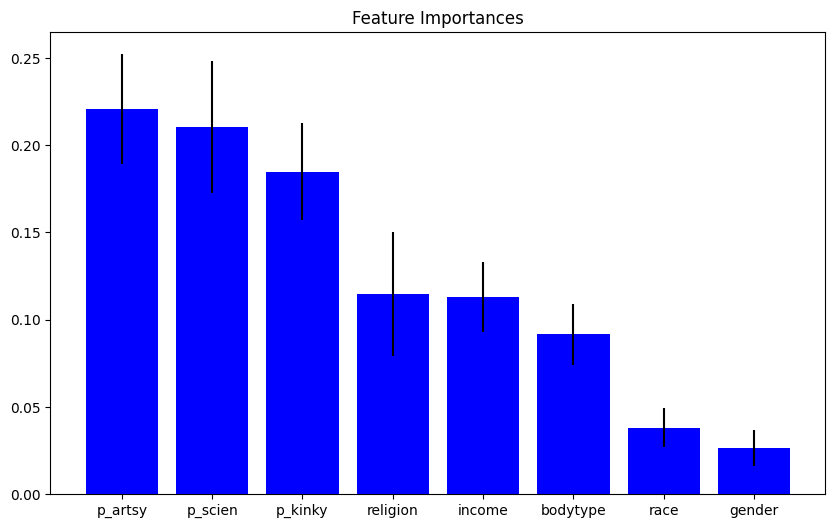

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(Xvals.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(Xvals.shape[1]), important_features.index)
plt.show()
fig = plt.gcf()